# STAT 339: HOMEWORK 0 (CODING AND MATRIX ALGEBRA WARMUP)
Aviva Blonder

Monday, February 6th, 2017

In [20]:
# make plots show up under the code that produced them instead of in a separate window
%matplotlib inline
# All of the packages needed to run the code below
import matplotlib.pyplot as plt
import numpy as np
import random

## 1. Creating some simple plots.

### a) Produce a plot of the floor function.

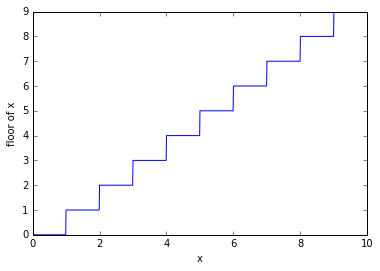

In [21]:
# create the domain (from 0 to 10)
xvals = np.arange(0.0, 10.0, .01)
# and plot the floor function
plt.plot(xvals, np.floor(xvals))
# don't forget the labels
plt.xlabel("x")
plt.ylabel("floor of x")
plt.show()

### b) Plot 3 different lines on the same plot.

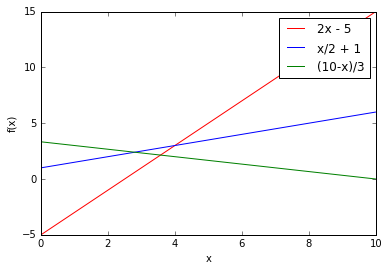

In [22]:
# I'm going to keep using xvals for the domain, so all I have to do here is create the plot
plt.plot(xvals, xvals*2 - 5, 'r', xvals, xvals/2 + 1, 'b', xvals, (10-xvals)/3, 'g')
# add some axis labels
plt.xlabel("x")
plt.ylabel("f(x)")
# and a legend
plt.legend(["2x - 5", "x/2 + 1", "(10-x)/3"])
plt.show()

### c) Plot the unit circle.

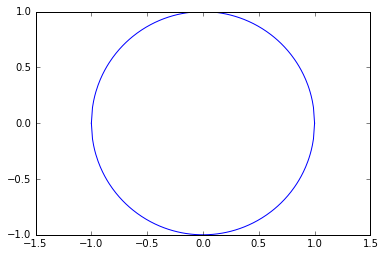

In [23]:
# set the domain from -1 to 1
x = np.arange(-1.0, 1.0, .01)
# plot a circle based on the function 1 = x**2 + y**2
y = np.sqrt(1-x**2)
# for some reason, np.sqrt can't handle values of 0, so I'm going to add the last value corresponding to 1 by hand
y = np.append(y, 0)
x = np.append(x, 1)
# I have to plot the negative and positive halves separately
plt.plot(x, y, 'b', x, -y, 'b')
# make the dimensions equal so it looks like a circle, not an oval
plt.axis('equal')
plt.show()

## 2. Matrix manipulation and loops.

### a) Load data into a matrix.

In [24]:
# loads the data from a file in the same directory and turns it into a numpy matrix
A = np.loadtxt("big_matrix.txt")

### b) Get and store the number of rows and columns in the matrix.

In [25]:
# numpy's shape function returns a list of the number of rows/columns in each dimension
s = A.shape
# first get the number of rows
R = s[0]
# then the number of columns
C = s[1]

### c) Normalize each value in the matrix so that it is between 0 and 1.

In [26]:
# divide every entry by the largest value in the matrix
A /= A.max()

### d) Apply a nonlinear transformation to the values in the matrix to stretch the values near 0 and compress them near 1.
Then visualize the matrix as a grayscale image where 0 is black and 1 is white.

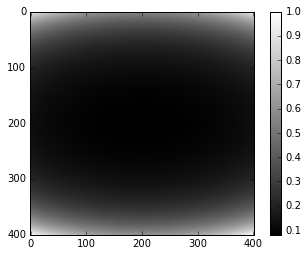

In [27]:
# applying a nonlinear transformation
A = A**(1/8)

# visualizing the image in grayscale
plt.imshow(A, cmap = 'gray')
# with a legend
plt.colorbar()
plt.show()

### e) Replace every 5th entry in every 5th row of a copy of the matrix with 0 and visualize it.

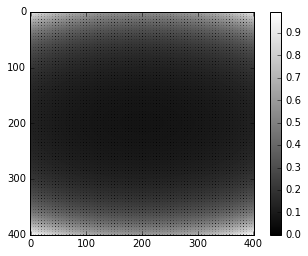

In [28]:
# create a copy of A
B = np.copy(A)

# loop through every 5th row
for row in range(0, R, 5):
    # loop through every 5th item
    for col in range(0, C, 5):
        # replace it with 0
        B[row, col] = 0

# visualizing
plt.imshow(B, cmap = 'gray')
plt.colorbar()
plt.show()

### f) Replace every 5th entry in every 5th row of the matrix with a 1.

In [29]:
# using an index expression this time
B[0:R:5, 0:C:5] = 1

### g) Save the modified matrix to a file.

In [39]:
np.savetxt("new_matrix.txt", B)

## 4. Creating a function.

Define a function that can do everything in part 2 above to any user provided matrix with a little more flexibility.

In [31]:
def matlattice(file, newfile, step):
    """Loads a matrix from a file, sets every nth value to 1 according to step,
    prints out a visualization of the matrix, and saves it to a new file"""
    
    # load the user provided file
    A = np.loadtxt(file)
    # calculate the number of rows and columns
    s = A.shape
    R = s[0]
    C = s[1]
    # create the lattice according to the user provided step
    A[0:R:step, 0:C:step] = 1
    # visualize the matrix with the lattice
    plt.imshow(A, cmap = 'gray')
    plt.colorbar()
    plt.show()
    # save the new matrix as a new file with the user provided name
    np.savetxt(newfile, A)

## 5. Random numbers and counting.

Define a function that simulates throwing two dice a given number of times.

In [32]:
def dice(d, n, y):
    """Simulates throwing two d-sided dice n times. Returns the proportion of times the dice sum to y."""
    
    # counter for the number of times the sum of the rolls equals y
    success = 0
    
    # roll the dice n times
    for roll in range(n):
        # roll die 1
        d1 = random.randint(1, d)
        # roll die 2
        d2 = random.randint(1, d)
        # test to see if the sum of the two dice is y
        if d1+d2 == y:
            # if so, add 1 to success
            success += 1
    
    #return the proportion of successes
    return success/n

Now, run the function several times and compare the proportion of rolls that sum to 12.

In [33]:
# we'll be comparing the results of two different sets of runs
for i in range(2):
    # first set the random seed to 42
    random.seed(42)
    # then call the function I just created 10 times in a row with the same parameters
    for i in range(10):
        # roll 2 6-sided dice 100 times, and print out the proportion of those rolls that sums to 12
        print(dice(6, 100, 12))
    # print out an extra line to distinguish between the two runs
    print()

0.04
0.04
0.05
0.03
0.02
0.0
0.03
0.05
0.04
0.07

0.04
0.04
0.05
0.03
0.02
0.0
0.03
0.05
0.04
0.07



First, notice that in each run one value, .04, appeared 3 times, and two values, .03 and .05, appeared two times each. This means that in multiple runs, the simulated dice summed to 12 the same number of times. However, within each run, there was hardly a consensus.

Between runs, we got the exact same values in the exact same order. This is very unlikely to have happened by chance, as the amount of variation within each run suggests. Instead, this occured because the random seed was set to 42 at the beginning of each run.
Controlling the random seed is useful when testing and debugging machine learning algorithms because using the same random seed across multiple runs holds all random variables constant. You can manipulate parameters to see how they effect the results without a risk of differences being just due to random chance.

## 6. Vector arithmetic. 

Define a function that that generates two 3 X 1 vectors with random entries and returns them, their sum, elementwise product, and dot product.

In [34]:
def vecfunc():
    """Generates two 3X1 vectors with random entries. Returns them, their sum, elementwise product, and dot product."""
    
    # create two 3X1 vectors with random entries between 0 and 1
    a = np.random.rand(3, 1)
    b = np.random.rand(3, 1)
    
    # calculate the vectors' sum
    vsum = np.add(a, b)
    # their elementwise product
    eprod = np.multiply(a, b)
    # and their dot product (but first, one vector has to be transposed)
    at = np.transpose(a)
    dprod = np.dot(at, b)
    
    # return a list containing all of them
    return [a, b, vsum, eprod, dprod]

Call the function and display the results.

In [35]:
# set the random seed so vecfunc doesn't return different values each time this is run
np.random.seed(37)

# call vecfunc and get the results
results = vecfunc()

# now to print them all out
print("vector 1: " + str(results[0]))
print("vector 2: " + str(results[1]))
print("their sum: " + str(results[2]))
print("their elementwise product: " + str(results[3]))
print("their dot product: " + str(results[4]))

vector 1: [[ 0.9444966 ]
 [ 0.46409817]
 [ 0.19279503]]
vector 2: [[ 0.58189488]
 [ 0.62008421]
 [ 0.68422402]]
their sum: [[ 1.52639148]
 [ 1.08418238]
 [ 0.87701905]]
their elementwise product: [[ 0.54959773]
 [ 0.28777995]
 [ 0.13191499]]
their dot product: [[ 0.96929267]]


In formatted mathematical notation, that is:

$ a = \begin{bmatrix} 0.9444966 \\
0.46409817 \\
0.19279503 \end{bmatrix} $

$ b = \begin{bmatrix} 0.58189488 \\
0.62008421 \\
0.68422402 \end{bmatrix} $

$ a + b = \begin{bmatrix} 1.52639148 \\
1.08418238 \\
0.87701905 \end{bmatrix} $

$ a \circ b = \begin{bmatrix} 0.54959773 \\
0.28777995 \\
0.13191499 \end{bmatrix} $

$ a \cdot b = 0.96929267 $

## 7. Matrix arithmetic.

Define a function that generates two 3X1 vectors and a 3X3 matrix with random entries. It returns them and the result of a series of matrix operations.

In [36]:
def matfunc():
    """Generates two 3X1 vectors and a 3X3 matrix with random entries.
    Returns them, the dot product of the first vector transposed and the matrix,
    the dot product of that with the second vector, the inverse of the matrix,
    and the inverse of the dot product of the matrix transposed and the original matrix."""
    
    # create two 3X1 vectors with random entries between 0 and 1
    a = np.random.rand(3, 1)
    b = np.random.rand(3, 1)
    # and a 3X3 matrix
    X = np.random.rand(3, 3)
    
    # transpose the first vector
    at = np.transpose(a)
    # calculate the dot product of the first vector transposed and the matrix
    dotatX = np.dot(at, X)
    # now calculate the dot product of that and the second vector
    dotatXb = np.dot(dotatX, b)
    
    # calculate the inverse of the matrix
    invX = np.linalg.inv(X)
    # transpose the matrix
    Xt = np.transpose(X)
    # calculate the inverse of the dot product of the transposed matrix with the original
    invdotX = np.linalg.inv(np.dot(Xt, X))
    
    # return a list containing the results of the operations performed
    return [a, b, X, dotatX, dotatXb, invX, invdotX]

Call the function above and display the results.

In [37]:
# set the random seed so matfunc doesn't return different values each time this is run
np.random.seed(37)

# call matfunc and get the results
results = matfunc()

# now to print them all out
print("vector 1: " + str(results[0]))
print("vector 2: " + str(results[1]))
print("matrix: " + str(results[2]))
print("the dot product of vector 1 transposed and the matrix: " + str(results[3]))
print("the dot product of vector 1 transposed, the matrix, and vector 2: " + str(results[4]))
print("the inverse of the matrix: " + str(results[5]))
print("the inverse of the dot product of the matrix transposed and the original: " + str(results[6]))

vector 1: [[ 0.9444966 ]
 [ 0.46409817]
 [ 0.19279503]]
vector 2: [[ 0.58189488]
 [ 0.62008421]
 [ 0.68422402]]
matrix: [[ 0.10343756  0.74547577  0.28197907]
 [ 0.75342459  0.79270563  0.6274006 ]
 [ 0.44348884  0.96346535  0.89706655]]
the dot product of vector 1 transposed and the matrix: [[ 0.53286184  1.25774389  0.73045372]]
the dot product of vector 1 transposed, the matrix, and vector 2: [[ 1.58977068]]
the inverse of the matrix: [[-0.59293845  2.20793919 -1.35783251]
 [ 2.21106718  0.17941021 -0.8204929 ]
 [-2.08159029 -1.28424354  2.66724921]]
the inverse of the dot product of the matrix transposed and the original: [[  7.07028062   0.19919203  -5.22295441]
 [  0.19919203   5.59421469  -7.02140143]
 [ -5.22295441  -7.02140143  13.09651795]]


In formatted mathematical notation, that is:

$ a = \begin{bmatrix} 0.9444966 \\
0.46409817 \\
0.19279503 \end{bmatrix}$

$ b = \begin{bmatrix} 0.58189488 \\
0.62008421 \\
0.68422402 \end{bmatrix} $

$ X = \begin{bmatrix} 0.10343756 & 0.74547577 & 0.28197907 \\
0.75342459 & 0.79270563 & 0.6274006 \\
0.44348884 & 0.96346535 & 0.89706655 \end{bmatrix}$

$ a^{\top} \cdot X = \begin{bmatrix} 0.53286184 & 1.25774389 & 0.73045372 \end{bmatrix} $

$ a^{\top} \cdot X \cdot b = 1.58977068 $

$ X^{-1} = \begin{bmatrix} -0.59293845 & 2.20793919 & -1.35783251 \\
2.21106718 & 0.17941021 & -0.8204929 \\
-2.08159029 & -1.28424354 & 2.66724921 \end{bmatrix}$

$(X^{\top} \cdot X)^{-1} = \begin{bmatrix} 7.07028062 & 0.19919203 & -5.22295441 \\
0.19919203 & 5.59421469 & -7.02140143 \\
-5.22295441 & -7.02140143 & 13.09651795 \end{bmatrix}$


Verify that matrix multiplication worked.

In [38]:
# to simplify things, I'll call the randomly generated matrix from above mat, and the first vector vec1
mat = results[2]
vec1 = results[0]

# create an empty vector which will hold the results of the dot multiplication
dot = np.zeros(3)
# each column of the matrix will contribute to the corresponding column of the product vector
for col in range(3):
    # multiply each item in the column with the corresponding item in the vector
    for item in range(3):
        # and add it to the correct column of the product vector
        dot[col] += mat[item, col]*vec1[item]

# the resulting vector should be the same as the product of the matrix and vector 1 transposed above
print(dot)

[ 0.53286184  1.25774389  0.73045372]


## 8. Linear Algebra Warmup.

### a) Show that $ w^{\top} \cdot X^{\top} \cdot X \cdot w = w_0^2 \sum_{n=1}^N x_{n1}^2 + 2w_0w_1 \sum_{n=1}^N x_{n1}x_{n2} + w_1^2 \sum_{n=1}^N x_{n2}^2 $

Given: $ w = \begin{bmatrix} w_0 \\ w_1 \end{bmatrix},  X = \begin{bmatrix} x_{11} & x_{12} \\ x_{21} & x_{22} \\ ... & ... \\ x_{N1} & x_{N2} \end{bmatrix} $

$ X^{\top} \cdot X = \begin{bmatrix} x_{11} & x_{21} & ... & x_{N1} \\ x_{12} & x_{22} & ... & x_{N2} \end{bmatrix} \cdot \begin{bmatrix} x_{11} & x_{12} \\ x_{21} & x_{22} \\ ... & ... \\ x_{N1} & x_{N2} \end{bmatrix} = \begin{bmatrix} \sum_{n=1}^N x_{n1}^2 & \sum_{n=1}^N x_{n1}x_{n2} \\ \sum_{n=1}^N x_{n1}x_{n2} & \sum_{n=1}^N x_{n2}^2 \end{bmatrix} $

Therefore $ w^{\top} \cdot X^{\top} \cdot X \cdot w = \begin{bmatrix} w_0 & w_1 \end{bmatrix} \cdot \begin{bmatrix} \sum_{n=1}^N x_{n1}^2 & \sum_{n=1}^N x_{n1}x_{n2} \\ \sum_{n=1}^N x_{n1}x_{n2} & \sum_{n=1}^N x_{n2}^2 \end{bmatrix} \cdot \begin{bmatrix} w_0 \\ w_1 \end{bmatrix}
 = \begin{bmatrix} w_0 \sum_{n=1}^N x_{n1}^2 + w_1 \sum_{n=1}^N x_{n1}x_{n2} & w_0 \sum_{n=1}^N x_{n1}x_{n2} + w_1 \sum_{n=1}^N x_{n2}^2 \end{bmatrix} \cdot \begin{bmatrix} w_0 \\ w_1 \end{bmatrix} \\
 = w_0^2 \sum_{n=1}^N x_{n1}^2 + 2w_0w_1 \sum_{n=1}^N x_{n1}x_{n2} + w_1^2 \sum_{n=1}^N x_{n2}^2 $
 
 as we intended to show.

### b) Show that $ (X \cdot w)^{\top} = w^{\top} \cdot X^{\top} $ Given the same definitions of X and w as above.

$ (X \cdot w)^{\top} = \Bigg( \begin{bmatrix} x_{11} & x_{12} \\ x_{21} & x_{22} \\ ... & ... \\ x_{N1} & x_{N2} \end{bmatrix} \cdot \begin{bmatrix} w_0 \\ w_1 \end{bmatrix} \Bigg)^{\top}
= \Bigg( \begin{bmatrix} x_{11}w_0 + x_{12}w_1 \\ x_{21}w_0 + x_{22}w_1 \\ ... \\ x_{N1}w_0 + x_{N2}w_1 \end{bmatrix} \Bigg)^{\top} 
= \begin{bmatrix}  x_{11}w_0 + x_{12}w_1 & x_{21}w_0 + x_{22}w_1 & ... & x_{N1}w_0 + x_{N2}w_1 \end{bmatrix} $

$ w^{\top} \cdot X^{\top} = \begin{bmatrix} w_0 & w_1 \end{bmatrix} \cdot \begin{bmatrix} x_{11} & x_{21} & ... & x_{N1} \\ x_{12} & x_{22} & ... & x_{N2} \end{bmatrix}
= \begin{bmatrix}  x_{11}w_0 + x_{12}w_1 & x_{21}w_0 + x_{22}w_1 & ... & x_{N1}w_0 + x_{N2}w_1 \end{bmatrix} $

as we intended to show.